<a href="https://colab.research.google.com/github/bchan9ASU/MAT421/blob/main/ModuleC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


A **root** of a function \( f(x) \) is a value \( x^* \) where:

\[
f(x*) = 0
\]

For example, solving:

\[
x^2 - 4 = 0
\]

requires finding \( x \) where \( f(x) = x^2 - 4 \) equals zero.

Below, we plot a function to visualize its root.

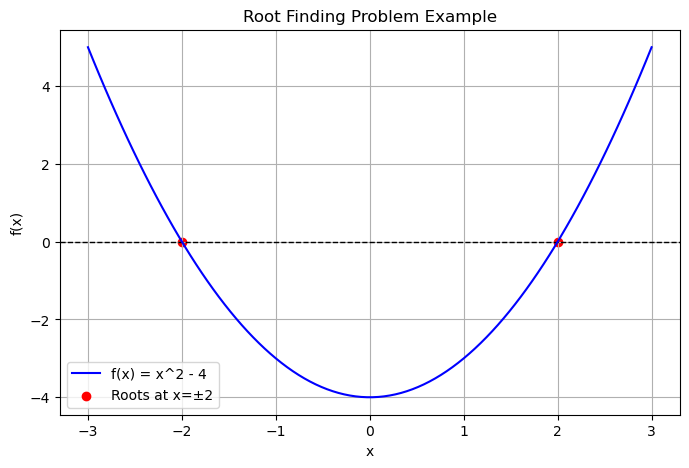

In [ ]:
# Define function
def f(x):
    return x**2 - 4

# Generate values for plotting
x_vals = np.linspace(-3, 3, 100)
y_vals = f(x_vals)

# Plot function
plt.figure(figsize=(8, 5))
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.plot(x_vals, y_vals, label='f(x) = x^2 - 4', color='blue')
plt.scatter([2, -2], [0, 0], color='red', label='Roots at x=±2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Root Finding Problem Example')
plt.legend()
plt.grid()
plt.show()


Tolerance in Root Finding

In numerical methods, we approximate the root within an acceptable tolerance.

The stopping criterion is when |f(x_n)| < some small value (tolerance).

Below, we check if an approximation is within tolerance.

In [ ]:
# Example: Checking if a root approximation is within tolerance

tolerance = 1e-6  # Define tolerance level
approximate_root = 1.999999  # Example approximation
true_root = 2

# Check if the approximation is within tolerance
if abs(approximate_root - true_root) < tolerance:
    print(f"Approximation {approximate_root} is within tolerance {tolerance}.")
else:
    print(f"Approximation {approximate_root} is NOT within tolerance {tolerance}.")


Approximation 1.999999 is within tolerance 1e-06.


Bisection Method
The Bisection Method finds roots by repeatedly halving an interval.

Steps:
1. Choose an interval [a, b] where f(a) and f(b) have opposite signs.
2. Compute the midpoint c.
3. If f(c) is close to zero, return c as the root.
4. Otherwise, update the interval:
   - If f(a) * f(c) < 0, set b = c.
   - Otherwise, set a = c.
5. Repeat until the desired tolerance is met.

Below is an implementation of the bisection method.

In [ ]:
def bisection_method(f, a, b, tol=1e-6):
    """Finds a root using the Bisection Method."""
    if f(a) * f(b) >= 0:
        raise ValueError("Function must have opposite signs at a and b")

    while (b - a) / 2 > tol:
        c = (a + b) / 2
        if abs(f(c)) < tol:
            return c
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c

    return (a + b) / 2  # Return best estimate

# Example Usage
root_bisect = bisection_method(f, 1, 3)
print(f"Root found using Bisection Method: {root_bisect:.6f}")


Root found using Bisection Method: 2.000000


Newton-Raphson Method

The Newton-Raphson Method is an iterative approach using derivatives for faster convergence.

Steps:
1. Start with an initial guess x_0.
2. Compute the next approximation using the formula: x_new = x_old - f(x_old) / f'(x_old)
3. Repeat until the function value is within tolerance.
Below is an implementation of the Newton-Raphson method.

In [ ]:
def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    """Finds a root using the Newton-Raphson Method."""
    x = x0
    for _ in range(max_iter):
        fx = f(x)
        dfx = df(x)
        if abs(fx) < tol:
            return x
        if dfx == 0:
            raise ValueError("Zero derivative encountered, method fails.")
        x -= fx / dfx
    return x

# Define the derivative of f(x)
def df(x):
    return 2*x

# Example Usage
root_newton = newton_raphson(f, df, x0=3)
print(f"Root found using Newton-Raphson Method: {root_newton:.6f}")

Root found using Newton-Raphson Method: 2.000000


Summary:

The Bisection Method is a reliable bracketing technique but converges slowly.
The Newton-Raphson Method converges faster but requires a differentiable function and a good initial guess.
Tolerance settings affect the accuracy and runtime of both methods.
Each method has strengths and is chosen based on problem constraints.